In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score,  roc_curve, matthews_corrcoef

In [60]:
class Evaluate:
    def __init__(self, true_values, predicted_values, predicted_probabilities=None):
        """
        Initialize the evaluation object with true values, predicted values, and optionally predicted probabilities.

        Args:
            true_values (list or array-like): True labels.
            predicted_values (list or array-like): Predicted labels.
            predicted_probabilities (list or array-like, optional): Predicted probabilities for positive class.

        Raises:
            ValueError: If the predicted or actual lists are empty, or if their lengths do not match.
        """
        if len(true_values) == 0 or len(predicted_values) == 0:
            raise ValueError("Predicted and actual lists cannot be empty.")
        if len(true_values) != len(predicted_values):
            raise ValueError("Predicted and actual lists must be of the same length.")
        if predicted_probabilities is not None and len(predicted_probabilities) != len(true_values):
            raise ValueError("Predicted probabilities must be of the same length as true values.")

        self.true_values = np.array(true_values)
        self.predicted_values = np.array(predicted_values)
        self.predicted_probabilities = np.array(predicted_probabilities) if predicted_probabilities is not None else None

    def accuracy(self):
        """Calculate the accuracy of the predictions."""
        return accuracy_score(self.true_values, self.predicted_values)

    def confusion_matrix(self):
        """
        Calculate confusion matrix rates.

        Returns:
            dict: Rates of True Negative (TN), False Positive (FP), False Negative (FN), and True Positive (TP).
        """
        tn, fp, fn, tp = confusion_matrix(self.true_values, self.predicted_values, labels=[0, 1]).ravel()

        # Calculate the total number of instances
        total = tn + fp + fn + tp

        # Return the rates instead of counts
        return {
            'TN Rate': tn / total,
            'FP Rate': fp / total,
            'FN Rate': fn / total,
            'TP Rate': tp / total
        }

    def precision(self):
        """Calculate the precision of the predictions."""
        return precision_score(self.true_values, self.predicted_values)

    def recall(self):
        """Calculate the recall of the predictions."""
        return recall_score(self.true_values, self.predicted_values)

    def f1(self):
        """Calculate the F1 score of the predictions."""
        return f1_score(self.true_values, self.predicted_values)

    def auc(self):
        """
        Calculate the Area Under the Receiver Operating Characteristic Curve (ROC AUC).

        Returns:
            float: AUC score.

        Raises:
            ValueError: If predicted probabilities are not provided.
        """
        if self.predicted_probabilities is None:
            raise ValueError("Predicted probabilities are required to calculate AUC.")
        return roc_auc_score(self.true_values, self.predicted_probabilities)
    
    def mcc(self):
        """Calculate the Matthews correlation coefficient (MCC)."""
        return matthews_corrcoef(self.true_values, self.predicted_values)

    def get_all_metrics(self):
        """
        Get all evaluation metrics.

        Returns:
            dict: Dictionary containing all evaluation metrics.
        """
        confusion_matrix_rates = self.confusion_matrix()
        metrics = {
            'Accuracy': self.accuracy(),
            'TN Rate': confusion_matrix_rates['TN Rate'],
            'FP Rate': confusion_matrix_rates['FP Rate'],
            'FN Rate': confusion_matrix_rates['FN Rate'],
            'TP Rate': confusion_matrix_rates['TP Rate'],
            'Precision': self.precision(),
            'Recall': self.recall(),
            'F1 Score': self.f1(),
            'MCC': self.mcc()
        }
        try:
            metrics['AUC'] = self.auc()
        except ValueError as e:
            metrics['AUC'] = str(e)

        return metrics
    
    # def plot_confusion_matrix(self):
    #     cm = confusion_matrix(self.true_values, self.predicted_values, labels=[0, 1])
    #     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    #     plt.title('Confusion Matrix')
    #     plt.ylabel('True label')
    #     plt.xlabel('Predicted label')
    #     plt.show()

    def plot_confusion_matrix(self):
        """
        Plot the confusion matrix as a heatmap with percentages.

        Returns:
            None
        """
        plt.figure(figsize=(15,10))
        cm = confusion_matrix(self.true_values, self.predicted_values, labels=[0, 1])
        cm_percentage = cm / np.sum(cm) * 100  # Convert counts to percentages
        sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
        plt.title('Confusion Matrix (%)')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

        # Adding percentage signs manually after plotting
        ax = plt.gca()
        for t in ax.texts:
            if "%" not in t.get_text():
                t.set_text(t.get_text() + " %")
        plt.show()

    def plot_roc_curve(self):
        """
        Plot the Receiver Operating Characteristic (ROC) curve.

        Returns:
            None

        Raises:
            ValueError: If predicted probabilities are not provided.
        """
        if self.predicted_probabilities is None:
            raise ValueError("Predicted probabilities are required to plot ROC curve.")
        fpr, tpr, _ = roc_curve(self.true_values, self.predicted_probabilities)
        plt.figure(figsize=(15,10))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % self.auc())
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()


In [61]:
# Create a random prediction to find if the class works
np.random.seed(42)  # For reproducibility
true_values = np.random.randint(0, 2, size=99)
predicted_values = np.random.randint(0, 2, size=99)
predicted_probabilities = np.random.rand(99)

# Create an instance of the Evaluate class
evaluate = Evaluate(true_values, predicted_values, predicted_probabilities)

In [62]:
# Create an evaluation
evaluate.get_all_metrics()

{'Accuracy': 0.45454545454545453,
 'Confusion Matrix Rates': {'TN Rate': 0.2222222222222222,
  'FP Rate': 0.21212121212121213,
  'FN Rate': 0.3333333333333333,
  'TP Rate': 0.23232323232323232},
 'Precision': 0.5227272727272727,
 'Recall': 0.4107142857142857,
 'F1 Score': 0.46,
 'MCC': -0.07746502801125198,
 'AUC': 0.47342192691029905}

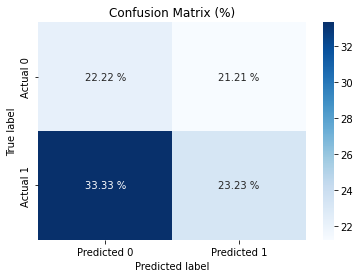

In [63]:
# Plotting the confusion matrix and ROC curve
evaluate.plot_confusion_matrix()

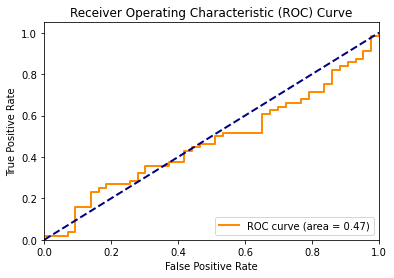

In [64]:
# plot the Roc curve
evaluate.plot_roc_curve()